In [1]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
from __future__ import print_function
import random
random.seed(2010)

import keras
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import backend as K


/home/ec2-user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
inv_f = lambda x : MC.inverse_uniform(x,0,1000)
X = MC.RandomVariable(inv_f,"uniform distribution from x=1:5")
sample_ratio  = .5

def two_linear_functions(x,slope1,slope2,intercept1,intercept2,std_dev1=1,std_dev2=1):
    coin_toss = (random.random() > sample_ratio)
    if coin_toss:
        return (MC.Linear_GaussianNoise(x,slope1,intercept1,std_dev1))
    else:
        return (MC.Linear_GaussianNoise(x,slope2,intercept2,std_dev2))

def two_split_linear_functions(x,x_stop,x_start,slope1,slope2,intercept1,intercept2,std_dev1=1,std_dev2=1):
    if x<x_stop:
        return (x,MC.Linear_GaussianNoise(x,slope1,intercept1,std_dev1))
    else:
        return (x+x_start-x_stop,MC.Linear_GaussianNoise(x+x_start-x_stop,slope2,intercept2,std_dev2))
        

    
#cost_f = lambda x : (x,two_linear_functions(x,1,0,0,0,20,20))
cost_f = lambda x : two_split_linear_functions(x,400,600,5,-2,0,0,5,5)
generate_toy_data = MC.Simulator(X,cost_f,'generator for two linear functions from x=1:5', verbose = True)

for y in generate_toy_data.sample_repeated(10):
    print (y)

testing random variable with distribution uniform distribution from x=1:5,
 945

New simulator for generator for two linear functions from x=1:5,
 with uniform distribution from x=1:5 input
(1085.4386159717474, -2173.665556812054)
(1135.2668647014812, -2271.7219005889824)
(1087.1464101527145, -2170.5889870561355)
(925.9793298347558, -1858.4113863530415)
(783.2147131007946, -1556.79874310982)
(1086.477766324993, -2182.0938771173787)
(1124.3363794728589, -2244.146761250871)
(357.5048898271489, 1783.9989331688987)
(821.7430217175829, -1649.0534844271942)
(653.684221797452, -1311.634455892164)


In [6]:
#################################
#######Construct Network#########
#################################


# Define sudoMin loss function


# Convolutional layers

# Example from Keras github


batch_size = 128
no_predictions = 2
epochs = 500

def customLoss(yTrue,yPred):
    return K.sum(K.min(K.square(yTrue-yPred),axis = 1))



sample_ratio = .5
TrainData = list(generate_toy_data.sample_repeated(400))
x_train, y_train  = zip(*TrainData)
TestData = list(generate_toy_data.sample_repeated(300))
x_test, y_test  = zip(*TestData)
x_train = np.array(x_train,ndmin = 2).T
y_train = np.array(y_train,ndmin = 2).T
x_test = np.array(x_test,ndmin = 2).T
y_test = np.array(y_test,ndmin = 2).T
# the data, split between train and test sets

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices


model = Sequential()
model.add(Dense(32, activation='relu',
                kernel_initializer='random_uniform', bias_initializer='zeros',
                input_shape=[1]))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu',
                kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu',
                kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(no_predictions, activation='linear'))

model.compile(loss=customLoss,
              optimizer=keras.optimizers.Nadam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])



x_train shape: (400, 1)
400 train samples
300 test samples
Test loss: 116931.10658854166


Text(0.5,1,'Multimodal Output, Toy Results')

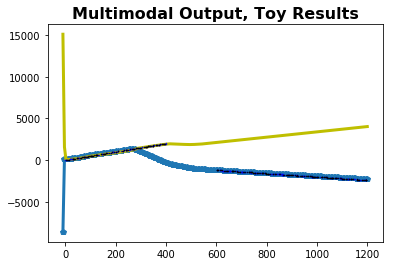

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(-10, 1200, 200)
Y1,Y2 = zip(*model.predict(X))
#Y1,Y2,Y3,Y4 = zip(*model.predict(X))

plt.scatter(x_train, y_train,s = .2, c='blue',zorder=2)
plt.scatter(x_test, y_test, s = .2 ,c='black',zorder=2)


plt.plot(X,Y1, 'p-',linewidth = 3,zorder=1)
plt.plot(X,Y2, 'y-',linewidth = 3,zorder=1)
#plt.plot(X,Y3, 'b-',linewidth = 3)
#plt.plot(X,Y4, 'y-',linewidth = 3)

#plt.ylim(0,300)
# Add title and x, y labels
plt.title("Multimodal Output, Toy Results", fontsize=16, fontweight='bold')


In [7]:
#Visualize Nodes
def customLoss(yTrue,yPred):
    t = K.variable(yTrue)
    p = K.variable(yPred)
    print(yTrue)
    print(yPred)
    print(K.eval(K.square(t)))
    print(K.eval(K.square(p)))
    print(K.eval(K.square(t-p)))
    
    X = K.square(t-p)
    X= K.min(K.square(t-p),axis= 1)
    return K.eval(X)
print(customLoss(np.array([[1],[2]]),np.array([[1,2,3],[4,5,6]])))




[[1]
 [2]]
[[1 2 3]
 [4 5 6]]
[[1.]
 [4.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[ 0.  1.  4.]
 [ 4.  9. 16.]]
[0. 4.]


In [6]:
model.predict(X)

array([[-9.34235001e+00, -6.48703003e+01,  1.16004395e+02,
         3.10886765e+01],
       [-5.35476446e+00, -5.62212982e+01,  4.43007774e+01,
         1.70080109e+01],
       [-5.31607676e+00, -4.32734261e+01,  5.32368279e+01,
         1.90285320e+01],
       [-5.27884626e+00, -2.97495155e+01,  6.26170540e+01,
         2.11492271e+01],
       [-5.39736605e+00, -1.70390282e+01,  7.25022202e+01,
         2.33880367e+01],
       [-5.77782011e+00, -5.69654179e+00,  8.32365341e+01,
         2.58254642e+01],
       [-6.15826750e+00,  5.64602184e+00,  9.39707718e+01,
         2.82628860e+01],
       [-6.53871679e+00,  1.69885597e+01,  1.04705078e+02,
         3.07003155e+01],
       [-6.91917372e+00,  2.83310623e+01,  1.15439392e+02,
         3.31377449e+01],
       [-6.43613577e+00,  3.77087402e+01,  1.20467712e+02,
         3.43745041e+01],
       [-5.55960035e+00,  4.69353905e+01,  1.18864807e+02,
         3.41457024e+01],
       [-4.68306780e+00,  5.61619835e+01,  1.17261864e+02,
      